<a href="https://colab.research.google.com/github/RyomaBF/CAP4630/blob/master/HW2part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
test_images = test_images_original.reshape((10000, 28 * 28))

In [0]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [0]:
(img_count, col_size, rows_size) = train_images_original.shape

(img_index, col_of_positives, rows_of_positives)= np.where(train_images_original > 0)


Below is extracting features from the train dataset

In [0]:
train_height = np.array([])
train_width = np.array([])

In [0]:
offset = img_index[1:]
offset = np.append(offset, img_index[0])
last = np.where(img_index != offset)[0]

offset = img_index[-1]
offset = np.append(offset, img_index[:-1])
first = np.where(img_index != offset)[0]

In [0]:
train_height = abs(col_of_positives[last] - col_of_positives[first]) + 1
train_width = abs(rows_of_positives[last] - rows_of_positives[first]) + 1

In [0]:
#reshaping the vectors
train_height = train_height.reshape(img_count, 1)
train_width = train_width.reshape(img_count, 1)

In [0]:
#making sure the data is between 0 to 1
train_height = train_height.astype('float32') / col_size
train_width = train_width.astype('float32') / rows_size


In [84]:
print("Max height value is",  np.max(train_height, axis=0))
print("Min height value is", np.min(train_height, axis=0))
print("Max width value is", np.max(train_width, axis=0))
print("MIn width value is", np.min(train_width, axis=0))

Max height value is [0.71428573]
Min height value is [0.32142857]
Max width value is [0.71428573]
MIn width value is [0.03571429]


Below is extracting features from the train dataset

In [0]:
(img_count, col_size, rows_size) = test_images_original.shape

(img_index, col_of_positives, rows_of_positives)= np.where(test_images_original > 0)

In [0]:
test_height = np.array([])
test_width = np.array([])

In [0]:
offset = img_index[1:]
offset = np.append(offset, img_index[0])
last = np.where(img_index != offset)[0]

In [0]:
offset = img_index[-1]
offset = np.append(offset, img_index[:-1])
first = np.where(img_index != offset)[0]

In [0]:
test_height = abs(col_of_positives[last] - col_of_positives[first]) + 1
test_width = abs(rows_of_positives[last] - rows_of_positives[first]) + 1

In [0]:
test_height = test_height.reshape(img_count, 1)
test_width = test_width.reshape(img_count, 1)

In [0]:
test_height = test_height.astype('float32') / col_size
test_width = test_width.astype('float32') / rows_size

In [92]:
print("Max height value is",  np.max(test_height, axis=0))
print("Min height value is", np.min(test_height, axis=0))
print("Max width value is", np.max(test_width, axis=0))
print("MIn width value is", np.min(test_width, axis=0))

Max height value is [0.71428573]
Min height value is [0.35714287]
Max width value is [0.71428573]
MIn width value is [0.03571429]


In [0]:
train_images = np.concatenate((train_images, train_height), axis = 1)
train_images = np.concatenate((train_images, train_width), axis = 1)

test_images = np.concatenate((test_images, test_height), axis = 1)
test_images = np.concatenate((test_images, test_width), axis = 1)

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [95]:
model = models.Sequential()

model.add(layers.Dense(512, activation = tf.nn.relu, input_shape=(28 * 28 + 2,)))
model.add(layers.Dense(10, activation = tf.nn.softmax))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               402944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 408,074
Trainable params: 408,074
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile( optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [97]:
#Set number of epochs
epochs = 10

history = model.fit(train_images, 
                    train_labels, 
                    epochs = epochs,
                    batch_size=128, 
                    validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 6s 96us/step - loss: 0.2580 - acc: 0.9259 - val_loss: 0.1411 - val_acc: 0.9586
Epoch 2/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.1069 - acc: 0.9683 - val_loss: 0.0976 - val_acc: 0.9693
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0705 - acc: 0.9790 - val_loss: 0.0731 - val_acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0525 - acc: 0.9838 - val_loss: 0.0669 - val_acc: 0.9809
Epoch 5/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0394 - acc: 0.9881 - val_loss: 0.0694 - val_acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0295 - acc: 0.9915 - val_loss: 0.0728 - val_acc: 0.9780
Epoch 7/10
60000/60000 [==

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

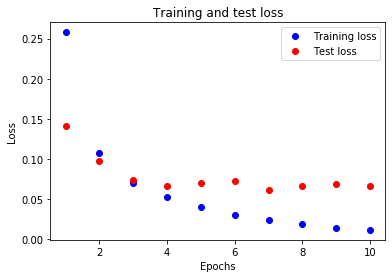

In [99]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

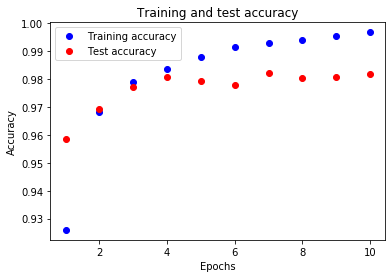

In [101]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()